# Setup Environment in Google Colab
Configure Google Colab environment, check for GPU availability, and mount Google Drive for storage.

In [1]:
# Check if GPU is available
import torch
if torch.cuda.is_available():
    device = torch.device('cuda')
    print('GPU is available')
else:
    device = torch.device('cpu')
    print('GPU is not available, using CPU')

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Change directory to the project folder in Google Drive
import os
project_path = '/content/drive/MyDrive/3R1CSeg-MultiPolygon'
if not os.path.exists(project_path):
    os.makedirs(project_path)
os.chdir(project_path)
print(f'Changed working directory to {project_path}')

GPU is not available, using CPU
Mounted at /content/drive
Changed working directory to /content/drive/MyDrive/3R1CSeg-MultiPolygon


# Install YOLOv8
Install the Ultralytics YOLOv8 package and other required dependencies.

In [ ]:
# Install YOLOv8
!pip install ultralytics

# Verify the installation
!yolo checks

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

# Prepare Clothing Dataset
Download deepFashion 2 dataset from https://github.com/switchablenorms/DeepFashion2.

Using filter_data.py,I have uploaded a subset of the dataset which consist of 13k for training and 3250 images for validation (80% training, 20% validation).

### Training DataSet



Category 1: 1000 samples

Category 2: 1000 samples

Category 3: 362 samples

Category 4: 1000 samples

Category 5: 1000 samples


Category 6: 1000 samples

Category 7: 1000 samples

Category 8: 1000 samples

Category 9: 1000 samples

Category 10: 1000 samples

Category 11: 1000 samples

Category 12: 1000 samples

Category 13: 1000 samples

###  Validation Set:

Category 1: 250 samples

Category 2: 250 samples

Category 3: 100 samples

Category 4: 250 samples

Category 5: 250 samples

Category 6: 206 samples

Category 7: 250 samples

Category 8: 250 samples

Category 9: 250 samples

Category 10: 250 samples

Category 11: 250 samples

Category 12: 250 samples

Category 13: 250 samples

This is the data distribution of deepfasion2

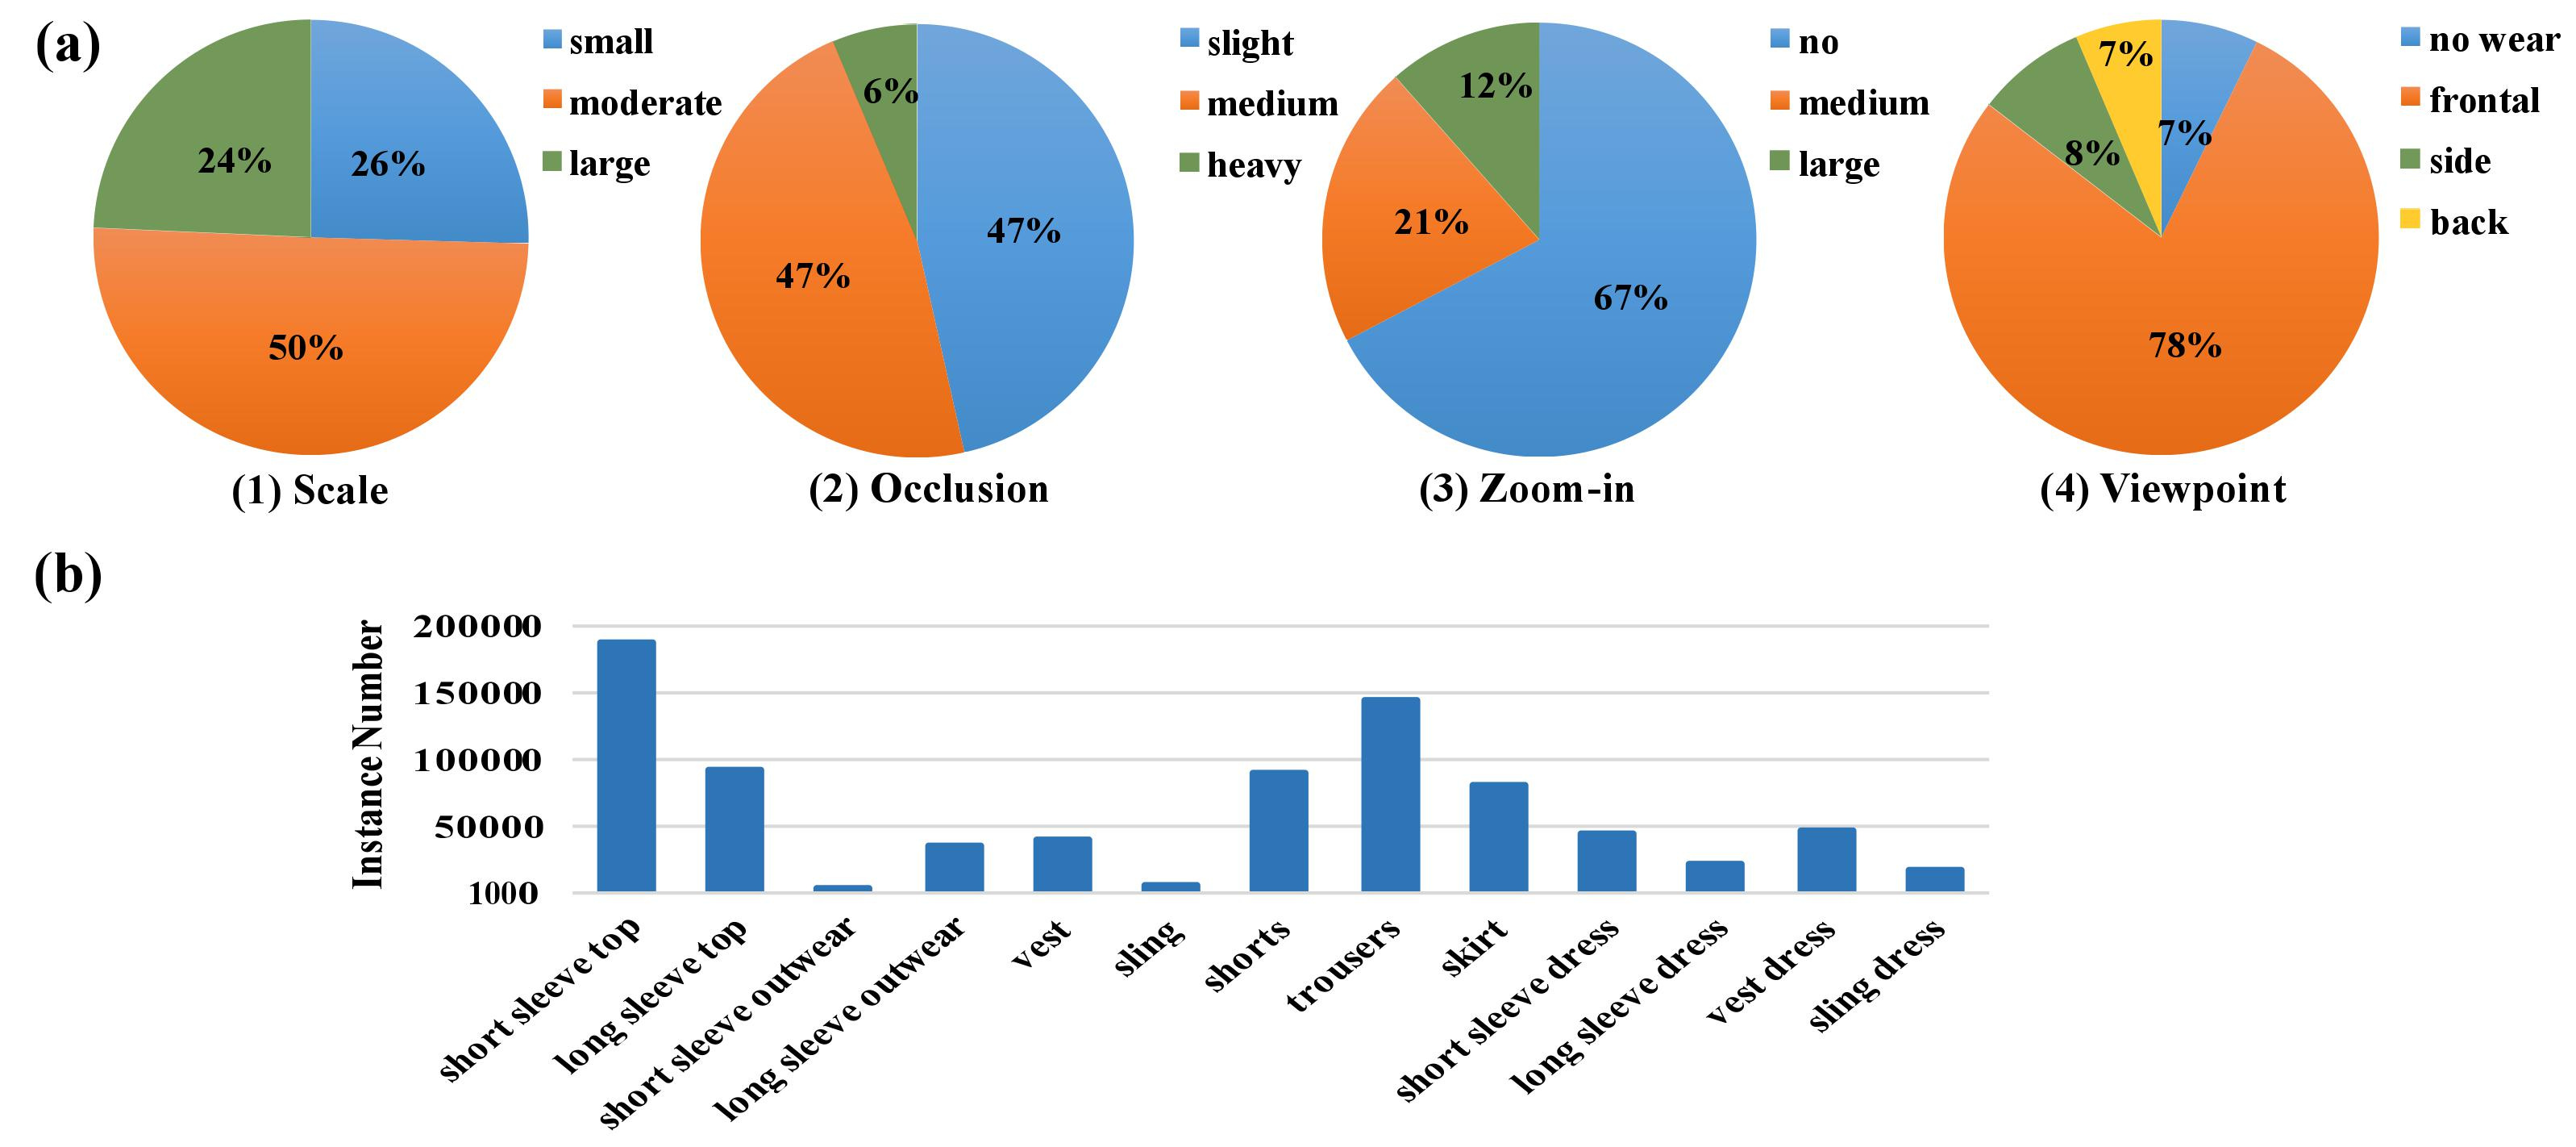

Also I have uploaded a utility tool (deepfashion2_to_yolo.py) to my github for coverting the format to yolo segmentation format.


Turn deepfasion2 data to yolo format
convert_deepfashion2_to_yolo(input_dir,images_dir, output_dir)

In [ ]:
#for testing purpose
!python deepfashion2_to_yolo.py datasets/coco/train_subset/annos datasets/coco/train_subset/images datasets/yolo/train/labels
!python deepfashion2_to_yolo.py datasets/coco/val_subset/annos datasets/coco/val_subset/images datasets/yolo/val/labels

Conversion completed. YOLO format annotations saved to datasets/yolo/train/labels
Conversion completed. YOLO format annotations saved to datasets/yolo/val/labels


In [ ]:
%%bash

# Define source and destination directories
source_dir="train/train/image"
destination_dir="datasets/train_subset/images"

# Create the destination directory if it doesn't exist
mkdir -p "$destination_dir"

# Find the first 10,000 images and copy them to the destination directory
find "$source_dir" -type f -name "*.jpg"| sort | head -n 10000 | xargs -I {} cp {} "$destination_dir"

echo "Copied the first 10,000 images from $source_dir to $destination_dir."

Copied the first 10,000 images from train/train/image to datasets/train_subset/images.


In [ ]:
%%bash

# Define source and destination directories
source_dir="train/train/annos"
destination_dir="datasets/train_subset/annos"

# Create the destination directory if it doesn't exist
mkdir -p "$destination_dir"

# Find the first 10,000 images and copy them to the destination directory
find "$source_dir" -type f -name "*.json"| sort | head -n 10000 | xargs -I {} cp {} "$destination_dir"

echo "Copied the first 10,000 annos from $source_dir to $destination_dir."

Copied the first 10,000 annos from train/train/annos to datasets/train_subset/annos.


In [ ]:
%%bash

# Define source and destination directories
source_dir="validation/validation/image"
destination_dir="datasets/val_subset/images"

# Create the destination directory if it doesn't exist
mkdir -p "$destination_dir"

# Find the first 10,000 images and copy them to the destination directory
find "$source_dir" -type f -name "*.jpg"| sort | head -n 10000 | xargs -I {} cp {} "$destination_dir"

echo "Copied the first 10,000 images from $source_dir to $destination_dir."

Copied the first 10,000 images from validation/validation/image to datasets/val_subset/images.


In [ ]:
%%bash

# Define source and destination directories
source_dir="validation/validation/annos"
destination_dir="datasets/val_subset/annos"

# Create the destination directory if it doesn't exist
mkdir -p "$destination_dir"

# Find the first 10,000 images and copy them to the destination directory
find "$source_dir" -type f -name "*.json"| sort | head -n 10000 | xargs -I {} cp {} "$destination_dir"

echo "Copied the first 10,000 annos from $source_dir to $destination_dir."

Copied the first 10,000 annos from validation/validation/annos to datasets/val_subset/annos.


In [ ]:
#convert the subset to yolo format
!python deepfashion2_to_yolo.py datasets/train_subset/annos datasets/train_subset/images datasets/train_subset/labels
!python deepfashion2_to_yolo.py datasets/val_subset/annos datasets/val_subset/images datasets/val_subset/labels

Conversion completed. YOLO format annotations saved to datasets/train_subset/labels
Conversion completed. YOLO format annotations saved to datasets/val_subset/labels


# Train the Segmentation Model
Train YOLOv8 segmentation model to identify clothing items and create masks for background removal.

In [ ]:
# Train the Segmentation Model

# Import necessary libraries
import torch
from ultralytics import YOLO

# Check if GPU is available
if torch.cuda.is_available():
    device = torch.device('cuda')
    print('GPU is available')
else:
    device = torch.device('cpu')
    print('GPU is not available, using CPU')


# Initialize the YOLOv8 model for segmentation
model_segmentation = YOLO('yolo11s-seg.pt')  # Use a pre-trained YOLOv11 model for segmentation
# model_segmentation.tune(data="yoloTune.yaml", epochs=50, iterations=300, optimizer="AdamW", imgsz=640 ,batch=0.7)

# Configure the model for training
model_segmentation.train(data='yoloSeg.yaml', epochs=100, imgsz=640,batch=0.7,optimizer="AdamW")

print('YOLOv11 segmentation model training completed.')

GPU is available
Ultralytics 8.3.105 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=segment, mode=train, model=yolo11s-seg.pt, data=yoloSeg.yaml, epochs=100, time=None, patience=100, batch=0.7, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train123, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, s

train: Scanning /content/drive/MyDrive/3R1CSegmentation/datasets/train_subset/labels.cache... 10000 images, 0 backgrounds, 56 corrupt: 100%|██████████| 10000/10000 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/3R1CSegmentation/datasets/train_subset/images/000013.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/3R1CSegmentation/datasets/train_subset/images/000014.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/3R1CSegmentation/datasets/train_subset/images/000114.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/3R1CSegmentation/datasets/train_subset/images/000115.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/3R1CSegmentation/datasets/train_subset/images/000117.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/3R1CSegmentation/datasets/train_subset/images/000122.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/3R1CSegmentation/datasets/train_subset/images/000129.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0011]
train: WARNING ⚠️ /content/drive/MyDrive/3R1CSegmentation

      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
    10087319       35.62         2.496         40.76           nan        (1, 3, 640, 640)                    list
    10087319       71.24         2.682         38.21           nan        (2, 3, 640, 640)                    list
    10087319       142.5         4.333         42.18           nan        (4, 3, 640, 640)                    list
    10087319       284.9         6.967         45.63           nan        (8, 3, 640, 640)                    list
    10087319       569.9        12.558         50.17           nan       (16, 3, 640, 640)                    list
    10087319        1140        22.993         56.04           nan       (32, 3, 640, 640)                    list
    10087319        2280        44.218         95.24           nan       (64, 3, 640, 640)                    list
AutoBatch: Using batch-size 35 for CUDA:0 30.62G/39.56G (77%) ✅


train: Scanning /content/drive/MyDrive/3R1CSegmentation/datasets/train_subset/labels.cache... 10000 images, 0 backgrounds, 56 corrupt: 100%|██████████| 10000/10000 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/3R1CSegmentation/datasets/train_subset/images/000013.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/3R1CSegmentation/datasets/train_subset/images/000014.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/3R1CSegmentation/datasets/train_subset/images/000114.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/3R1CSegmentation/datasets/train_subset/images/000115.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/3R1CSegmentation/datasets/train_subset/images/000117.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/3R1CSegmentation/datasets/train_subset/images/000122.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/3R1CSegmentation/datasets/train_subset/images/000129.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0011]
train: WARNING ⚠️ /content/drive/MyDrive/3R1CSegmentation


val: Scanning /content/drive/MyDrive/3R1CSegmentation/datasets/val_subset/labels.cache... 4286 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4286/4286 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/3R1CSegmentation/datasets/val_subset/images/000643.jpg: 1 duplicate labels removed


Plotting labels to runs/segment/train123/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.000546875), 100 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/segment/train123
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      11.1G      1.577      3.996      2.684      1.639         43        640: 100%|██████████| 285/285 [01:29<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:37<00:00,  1.63it/s]


                   all       4286       6776     0.0891     0.0862    0.00848    0.00311      0.385    0.00026   2.45e-05    6.2e-06

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      14.2G       1.56      3.809       2.47      1.628         45        640: 100%|██████████| 285/285 [01:27<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:34<00:00,  1.80it/s]


                   all       4286       6776      0.349      0.167     0.0965     0.0529      0.294     0.0823     0.0376     0.0149

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      14.2G       1.41       3.52      2.177      1.517         38        640: 100%|██████████| 285/285 [01:23<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:32<00:00,  1.91it/s]


                   all       4286       6776      0.538      0.134      0.107     0.0612      0.377      0.109     0.0503     0.0211

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      14.2G      1.368      3.411      2.069      1.476         38        640: 100%|██████████| 285/285 [01:23<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:37<00:00,  1.66it/s]


                   all       4286       6776      0.154      0.216      0.123     0.0797      0.117       0.16     0.0816     0.0416

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      14.2G      1.306      3.263      1.951      1.429         22        640: 100%|██████████| 285/285 [01:23<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:31<00:00,  2.00it/s]


                   all       4286       6776       0.29      0.238      0.184      0.124      0.234      0.188      0.117     0.0645

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      14.2G       1.26      3.182      1.868      1.397         25        640: 100%|██████████| 285/285 [01:23<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:30<00:00,  2.03it/s]


                   all       4286       6776      0.311      0.295      0.212      0.146      0.262      0.205      0.141     0.0763

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      14.2G       1.22      3.092      1.785      1.362         35        640: 100%|██████████| 285/285 [01:22<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:30<00:00,  2.04it/s]


                   all       4286       6776      0.479      0.293       0.24      0.177      0.419      0.207      0.153     0.0846

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      14.2G      1.192      3.009      1.716       1.34         22        640: 100%|██████████| 285/285 [01:23<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:31<00:00,  1.97it/s]


                   all       4286       6776      0.388      0.275      0.211       0.15      0.328      0.209      0.144     0.0825

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      14.2G      1.175       2.98      1.686      1.321         40        640: 100%|██████████| 285/285 [01:22<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:30<00:00,  2.04it/s]


                   all       4286       6776      0.491      0.294      0.251      0.185      0.438      0.202      0.161     0.0899

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      14.2G      1.148      2.905      1.618      1.301         39        640: 100%|██████████| 285/285 [01:23<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:30<00:00,  2.07it/s]


                   all       4286       6776      0.477      0.286      0.232      0.169      0.428      0.201      0.157     0.0865

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      14.2G      1.142      2.904      1.615      1.298         21        640: 100%|██████████| 285/285 [01:23<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:30<00:00,  2.04it/s]


                   all       4286       6776       0.41      0.267      0.233      0.172      0.346      0.194      0.149     0.0811

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      14.2G      1.127       2.85      1.582      1.283         31        640: 100%|██████████| 285/285 [01:22<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:30<00:00,  2.05it/s]


                   all       4286       6776      0.449      0.286      0.247      0.182      0.388      0.204       0.16     0.0897

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      14.2G      1.112      2.825      1.536      1.276         23        640: 100%|██████████| 285/285 [01:23<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:30<00:00,  2.06it/s]


                   all       4286       6776      0.385      0.335      0.259      0.192      0.312      0.241      0.173     0.0984

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      14.2G      1.107       2.78      1.519      1.269         31        640: 100%|██████████| 285/285 [01:23<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:30<00:00,  2.05it/s]


                   all       4286       6776      0.458      0.313       0.25      0.181      0.409      0.218      0.172     0.0937

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      14.2G       1.08      2.737      1.481      1.251         43        640: 100%|██████████| 285/285 [01:23<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:30<00:00,  2.05it/s]


                   all       4286       6776      0.479       0.34      0.301      0.228      0.317      0.265      0.205      0.124

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      14.2G      1.078      2.722      1.471       1.25         41        640: 100%|██████████| 285/285 [01:23<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:29<00:00,  2.10it/s]


                   all       4286       6776      0.376      0.303      0.266      0.202      0.341       0.23      0.201       0.12

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      14.2G      1.071      2.708      1.443      1.241         26        640: 100%|██████████| 285/285 [01:22<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:29<00:00,  2.11it/s]


                   all       4286       6776      0.415      0.326      0.272      0.208      0.363      0.233       0.19      0.115

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      14.2G      1.063      2.704      1.429      1.237         35        640: 100%|██████████| 285/285 [01:23<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:29<00:00,  2.08it/s]


                   all       4286       6776      0.423      0.346      0.273      0.206      0.277      0.271      0.184      0.111

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      14.2G      1.047      2.632       1.39      1.225         21        640: 100%|██████████| 285/285 [01:23<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:29<00:00,  2.07it/s]


                   all       4286       6776      0.314      0.328      0.284      0.215      0.254      0.231      0.188      0.108

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      14.2G      1.032      2.635      1.368      1.214         41        640: 100%|██████████| 285/285 [01:23<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:30<00:00,  2.05it/s]


                   all       4286       6776      0.276      0.363      0.286      0.214       0.23      0.278      0.201      0.117

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      14.2G      1.031      2.599      1.356      1.211         20        640: 100%|██████████| 285/285 [01:23<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:30<00:00,  2.05it/s]


                   all       4286       6776      0.398      0.348      0.306      0.237      0.345       0.25      0.215      0.131

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      14.2G      1.019      2.591       1.33      1.202         14        640: 100%|██████████| 285/285 [01:23<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:29<00:00,  2.09it/s]


                   all       4286       6776      0.324      0.362      0.328      0.257      0.266      0.263      0.228      0.138

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      14.2G      1.011      2.571      1.312      1.196         30        640: 100%|██████████| 285/285 [01:24<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:29<00:00,  2.13it/s]


                   all       4286       6776      0.293      0.346        0.3      0.233      0.242      0.243      0.194      0.115

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      14.2G      1.004      2.544      1.305      1.196         44        640: 100%|██████████| 285/285 [01:23<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:29<00:00,  2.13it/s]


                   all       4286       6776      0.277      0.392      0.315      0.246      0.229      0.289      0.217      0.129

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      14.2G     0.9994       2.54      1.286      1.185         44        640: 100%|██████████| 285/285 [01:23<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:29<00:00,  2.07it/s]


                   all       4286       6776      0.489      0.364      0.331      0.258      0.442       0.27      0.234       0.14

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      14.2G     0.9919      2.504      1.275      1.185         52        640: 100%|██████████| 285/285 [01:23<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:29<00:00,  2.11it/s]


                   all       4286       6776       0.43      0.342      0.322      0.253      0.374      0.255      0.228      0.137

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      14.2G      0.992      2.514      1.265      1.185         49        640: 100%|██████████| 285/285 [01:23<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:29<00:00,  2.08it/s]


                   all       4286       6776      0.385      0.379      0.317       0.25      0.341      0.283      0.223      0.138

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      14.2G     0.9792       2.47      1.221      1.172         30        640: 100%|██████████| 285/285 [01:23<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:29<00:00,  2.08it/s]


                   all       4286       6776      0.468      0.356      0.323      0.256       0.41      0.265      0.224      0.138

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      14.2G     0.9628      2.442      1.203      1.162         22        640: 100%|██████████| 285/285 [01:22<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:29<00:00,  2.13it/s]


                   all       4286       6776      0.481      0.358      0.343      0.273      0.329       0.29      0.238      0.148

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      14.2G     0.9714      2.458      1.219      1.167         21        640: 100%|██████████| 285/285 [01:23<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:29<00:00,  2.08it/s]


                   all       4286       6776      0.306      0.389      0.322      0.257      0.247      0.297      0.229      0.142

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      14.2G     0.9655      2.429      1.197      1.165         18        640: 100%|██████████| 285/285 [01:23<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:29<00:00,  2.13it/s]


                   all       4286       6776      0.403      0.378      0.335      0.266      0.353      0.288       0.24      0.147

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      14.2G      0.959      2.423      1.181      1.158         52        640: 100%|██████████| 285/285 [01:24<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:29<00:00,  2.12it/s]


                   all       4286       6776       0.44      0.383      0.342      0.274      0.383      0.281      0.238      0.148

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      14.2G      0.954      2.393      1.177      1.155         30        640: 100%|██████████| 285/285 [01:24<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:29<00:00,  2.08it/s]


                   all       4286       6776       0.32      0.368      0.323      0.256      0.265      0.282      0.236       0.15

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      14.2G     0.9489      2.372      1.163      1.153         46        640: 100%|██████████| 285/285 [01:23<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:29<00:00,  2.13it/s]


                   all       4286       6776      0.492      0.363      0.338      0.271      0.439      0.274       0.24      0.148

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      14.2G     0.9365      2.351       1.13      1.146         33        640: 100%|██████████| 285/285 [01:23<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:30<00:00,  2.05it/s]


                   all       4286       6776      0.348      0.386      0.352      0.284      0.297      0.298      0.256       0.16

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      14.2G     0.9408      2.354      1.144      1.147         54        640: 100%|██████████| 285/285 [01:23<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:29<00:00,  2.13it/s]


                   all       4286       6776      0.404      0.375      0.338      0.273      0.349      0.288      0.248      0.157

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      14.2G     0.9383       2.33      1.125      1.145         33        640: 100%|██████████| 285/285 [01:23<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:29<00:00,  2.10it/s]


                   all       4286       6776      0.312      0.401      0.337       0.27      0.258      0.312      0.243      0.152

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      14.2G     0.9321      2.331       1.12       1.14         31        640: 100%|██████████| 285/285 [01:24<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:29<00:00,  2.12it/s]


                   all       4286       6776      0.413      0.393      0.357      0.288      0.354      0.296      0.254      0.162

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      14.2G     0.9239      2.323      1.101      1.139         26        640: 100%|██████████| 285/285 [01:23<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:29<00:00,  2.12it/s]


                   all       4286       6776      0.526      0.358      0.356      0.286      0.463      0.257      0.248      0.155

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      14.2G     0.9261      2.317      1.099      1.136         35        640: 100%|██████████| 285/285 [01:22<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:29<00:00,  2.08it/s]


                   all       4286       6776      0.457      0.362      0.359       0.29      0.393      0.257      0.255      0.155

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      14.2G     0.9168      2.294      1.086      1.131         34        640: 100%|██████████| 285/285 [01:23<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:29<00:00,  2.11it/s]


                   all       4286       6776      0.473      0.386       0.36      0.292      0.404      0.276      0.247      0.153

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      14.2G     0.9084      2.265      1.065      1.125         32        640: 100%|██████████| 285/285 [01:22<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:29<00:00,  2.13it/s]


                   all       4286       6776      0.492      0.379      0.355      0.288      0.432      0.271      0.246      0.149

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      14.2G     0.9057      2.259       1.05      1.123         48        640: 100%|██████████| 285/285 [01:23<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:28<00:00,  2.15it/s]


                   all       4286       6776      0.423      0.381       0.36      0.291      0.456      0.257      0.245      0.152

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      14.2G     0.8986      2.222      1.042      1.119         57        640: 100%|██████████| 285/285 [01:23<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:29<00:00,  2.13it/s]


                   all       4286       6776      0.448      0.367      0.367      0.299       0.29      0.279      0.254      0.157

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      14.2G     0.8952      2.228      1.042      1.117         33        640: 100%|██████████| 285/285 [01:23<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:29<00:00,  2.12it/s]


                   all       4286       6776      0.535      0.366      0.362      0.296      0.364      0.283      0.255      0.158

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      14.2G        0.9      2.216      1.032       1.12         52        640: 100%|██████████| 285/285 [01:23<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:29<00:00,  2.14it/s]


                   all       4286       6776      0.499      0.395      0.355      0.289      0.441      0.279      0.248      0.157

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      14.2G     0.8926      2.204      1.019      1.113         41        640: 100%|██████████| 285/285 [01:23<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:29<00:00,  2.11it/s]


                   all       4286       6776      0.451      0.377      0.364      0.297      0.394      0.282      0.255      0.159

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      14.2G     0.8902      2.193      1.013      1.109         19        640: 100%|██████████| 285/285 [01:23<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:29<00:00,  2.11it/s]


                   all       4286       6776       0.43      0.393      0.361      0.296      0.364      0.291      0.257      0.162

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      14.2G     0.8853      2.178     0.9985      1.107         34        640: 100%|██████████| 285/285 [01:23<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:29<00:00,  2.12it/s]


                   all       4286       6776      0.512      0.396      0.367        0.3      0.448       0.29       0.26      0.162

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      14.2G     0.8865      2.182      1.006      1.112         46        640: 100%|██████████| 285/285 [01:23<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:29<00:00,  2.12it/s]


                   all       4286       6776      0.531      0.378       0.37      0.304      0.458      0.271      0.261      0.162

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      14.2G     0.8775      2.159     0.9805      1.101         41        640: 100%|██████████| 285/285 [01:23<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:28<00:00,  2.15it/s]


                   all       4286       6776      0.485      0.385      0.373      0.305      0.387       0.28      0.257      0.159

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      14.2G     0.8748      2.157     0.9879      1.102         40        640: 100%|██████████| 285/285 [01:23<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:29<00:00,  2.11it/s]


                   all       4286       6776      0.451      0.384       0.37      0.303      0.389      0.268      0.258      0.158

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      14.2G     0.8715      2.136     0.9752        1.1         28        640: 100%|██████████| 285/285 [01:23<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:28<00:00,  2.15it/s]


                   all       4286       6776      0.343      0.403      0.363      0.295       0.28      0.297      0.249      0.152

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      14.2G     0.8695      2.145     0.9633      1.098         26        640: 100%|██████████| 285/285 [01:23<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:28<00:00,  2.15it/s]


                   all       4286       6776      0.528      0.378      0.368      0.302      0.435      0.292      0.256      0.158

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      14.2G     0.8618      2.111       0.95      1.092         33        640: 100%|██████████| 285/285 [01:23<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:29<00:00,  2.12it/s]


                   all       4286       6776      0.442      0.403      0.367        0.3      0.363      0.299      0.255      0.158

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      14.2G     0.8621      2.111     0.9499       1.09         51        640: 100%|██████████| 285/285 [01:23<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:28<00:00,  2.15it/s]


                   all       4286       6776      0.449       0.41      0.367      0.301      0.404      0.285      0.259      0.162

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      14.2G     0.8582      2.102     0.9457       1.09         42        640: 100%|██████████| 285/285 [01:23<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:29<00:00,  2.13it/s]


                   all       4286       6776      0.441      0.384      0.363      0.299      0.279      0.284      0.252      0.156

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      14.2G     0.8482      2.088     0.9276      1.085         39        640: 100%|██████████| 285/285 [01:23<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:29<00:00,  2.13it/s]


                   all       4286       6776      0.399      0.406      0.369      0.304      0.327       0.29      0.258      0.157

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      14.2G     0.8504      2.069     0.9215      1.087         27        640: 100%|██████████| 285/285 [01:23<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:29<00:00,  2.13it/s]


                   all       4286       6776      0.407      0.412      0.372      0.305      0.331      0.293      0.259       0.16

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      14.2G     0.8523      2.053     0.9096      1.084         36        640: 100%|██████████| 285/285 [01:23<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:29<00:00,  2.12it/s]


                   all       4286       6776      0.371      0.401      0.369      0.304      0.298      0.275      0.257      0.159

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      14.2G     0.8424      2.042     0.9066      1.081         18        640: 100%|██████████| 285/285 [01:22<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:28<00:00,  2.14it/s]


                   all       4286       6776      0.354      0.403      0.372      0.307      0.288      0.291      0.258      0.158

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      14.2G     0.8311      2.017     0.8874      1.073         36        640: 100%|██████████| 285/285 [01:23<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:29<00:00,  2.14it/s]


                   all       4286       6776      0.463      0.374      0.371      0.304      0.297      0.271      0.253      0.153

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      14.2G     0.8347       2.02     0.8909      1.076         22        640: 100%|██████████| 285/285 [01:23<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:28<00:00,  2.14it/s]


                   all       4286       6776      0.473      0.365      0.367      0.302      0.379       0.26      0.253      0.153

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      14.2G     0.8318      2.005     0.8839      1.073         39        640: 100%|██████████| 285/285 [01:23<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:28<00:00,  2.14it/s]


                   all       4286       6776      0.374      0.382      0.365        0.3      0.296      0.268      0.252      0.152

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      14.2G     0.8378      2.018     0.8849      1.075         38        640: 100%|██████████| 285/285 [01:23<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:28<00:00,  2.17it/s]


                   all       4286       6776       0.47      0.386      0.368      0.303      0.396      0.273      0.253      0.149

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      14.2G     0.8307          2      0.874      1.071         48        640: 100%|██████████| 285/285 [01:23<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:28<00:00,  2.16it/s]


                   all       4286       6776      0.419      0.383      0.369      0.304      0.336      0.273      0.253      0.149

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      14.2G     0.8224      1.979     0.8606      1.067         46        640: 100%|██████████| 285/285 [01:23<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:28<00:00,  2.17it/s]


                   all       4286       6776      0.394      0.392      0.366      0.301      0.319      0.274      0.253      0.149

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      14.2G     0.8157      1.976     0.8583      1.064         25        640: 100%|██████████| 285/285 [01:23<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:28<00:00,  2.15it/s]


                   all       4286       6776      0.395      0.398      0.369      0.305       0.32      0.277      0.257      0.152

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100      14.2G     0.8117      1.962     0.8482      1.062         23        640: 100%|██████████| 285/285 [01:22<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:28<00:00,  2.16it/s]


                   all       4286       6776      0.354      0.433      0.367      0.304      0.285      0.303      0.254      0.152

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      14.2G     0.8149      1.949     0.8425      1.065         41        640: 100%|██████████| 285/285 [01:23<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:29<00:00,  2.11it/s]


                   all       4286       6776      0.384      0.397      0.366      0.303      0.308      0.276      0.254      0.149

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100      14.2G     0.8149      1.957     0.8485      1.064         43        640: 100%|██████████| 285/285 [01:23<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:28<00:00,  2.15it/s]


                   all       4286       6776      0.387      0.403      0.368      0.303      0.312      0.281      0.255      0.152

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      14.2G     0.8086      1.937     0.8366      1.058         35        640: 100%|██████████| 285/285 [01:22<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:28<00:00,  2.15it/s]


                   all       4286       6776      0.395      0.404      0.367      0.303       0.32       0.28      0.255      0.152

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100      14.2G     0.8072       1.93      0.832      1.057         35        640: 100%|██████████| 285/285 [01:23<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:29<00:00,  2.12it/s]


                   all       4286       6776      0.461      0.409      0.369      0.305      0.383      0.284      0.256      0.152

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      14.2G     0.8069      1.916     0.8255      1.057         33        640: 100%|██████████| 285/285 [01:23<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:28<00:00,  2.17it/s]


                   all       4286       6776       0.51      0.369      0.371      0.306      0.292      0.308      0.255      0.151

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      14.2G     0.8021      1.915     0.8144      1.054         27        640: 100%|██████████| 285/285 [01:22<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:29<00:00,  2.09it/s]


                   all       4286       6776      0.387      0.411      0.369      0.305      0.308      0.291      0.255      0.151

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      14.2G     0.7962      1.915     0.8158      1.054         17        640: 100%|██████████| 285/285 [01:22<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:29<00:00,  2.13it/s]


                   all       4286       6776      0.398      0.398      0.367      0.304      0.306      0.291      0.254      0.151

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100      14.2G     0.7978      1.899     0.8048      1.052         32        640: 100%|██████████| 285/285 [01:23<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:29<00:00,  2.13it/s]


                   all       4286       6776      0.452      0.409      0.366      0.304       0.38      0.283       0.25      0.149

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100      14.2G     0.7973      1.906      0.807      1.052         28        640: 100%|██████████| 285/285 [01:23<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:29<00:00,  2.13it/s]


                   all       4286       6776       0.46      0.401      0.364      0.302      0.306      0.284       0.25      0.148

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      14.2G     0.7868      1.873     0.7906      1.045         28        640: 100%|██████████| 285/285 [01:23<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:29<00:00,  2.13it/s]


                   all       4286       6776      0.399      0.398      0.365      0.303      0.317      0.279       0.25      0.147

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      14.2G     0.7907      1.866     0.7889      1.046         23        640: 100%|██████████| 285/285 [01:23<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:29<00:00,  2.12it/s]


                   all       4286       6776       0.49      0.389      0.364      0.302       0.41      0.268      0.251      0.149

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100      14.2G     0.7868      1.877     0.7878      1.047         31        640: 100%|██████████| 285/285 [01:23<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:28<00:00,  2.17it/s]


                   all       4286       6776      0.409      0.393      0.365      0.303      0.331      0.273      0.251       0.15

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      14.2G     0.7803      1.853      0.776      1.043         36        640: 100%|██████████| 285/285 [01:23<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:28<00:00,  2.16it/s]


                   all       4286       6776      0.392      0.406      0.365      0.303      0.317      0.284      0.252      0.149

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100      14.2G     0.7831      1.861     0.7822      1.044         24        640: 100%|██████████| 285/285 [01:23<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:28<00:00,  2.16it/s]


                   all       4286       6776      0.384      0.411      0.365      0.302      0.307      0.289      0.253       0.15

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100      14.2G     0.7785      1.837     0.7734       1.04         26        640: 100%|██████████| 285/285 [01:23<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:28<00:00,  2.16it/s]


                   all       4286       6776      0.404       0.39      0.365      0.303      0.328      0.276      0.254       0.15

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100      14.2G     0.7769      1.831     0.7713      1.041         47        640: 100%|██████████| 285/285 [01:23<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:28<00:00,  2.16it/s]


                   all       4286       6776      0.483      0.393      0.365      0.304      0.406      0.279      0.256       0.15

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      14.2G     0.7745      1.831     0.7569      1.038         29        640: 100%|██████████| 285/285 [01:22<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:28<00:00,  2.16it/s]


                   all       4286       6776      0.486       0.39      0.365      0.303       0.41      0.276      0.255       0.15

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      14.2G     0.7668      1.815     0.7528      1.037         21        640: 100%|██████████| 285/285 [01:22<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:28<00:00,  2.15it/s]


                   all       4286       6776      0.484      0.393      0.362      0.301      0.409      0.275      0.254      0.149

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100      14.2G     0.7667      1.805     0.7438      1.034         25        640: 100%|██████████| 285/285 [01:22<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:28<00:00,  2.14it/s]


                   all       4286       6776      0.492      0.387      0.361        0.3      0.418      0.271      0.253      0.149

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100      14.2G     0.7653      1.812     0.7448      1.033         34        640: 100%|██████████| 285/285 [01:22<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:28<00:00,  2.17it/s]


                   all       4286       6776       0.48      0.393      0.361        0.3      0.411      0.275      0.252      0.148

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      14.2G      0.761      1.793     0.7382      1.031         30        640: 100%|██████████| 285/285 [01:23<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:28<00:00,  2.17it/s]


                   all       4286       6776      0.469      0.401       0.36        0.3      0.396      0.282      0.251      0.148
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      14.2G     0.7367      1.548     0.5623      1.031         24        640: 100%|██████████| 285/285 [01:23<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:28<00:00,  2.15it/s]


                   all       4286       6776      0.488      0.388       0.36      0.299      0.417      0.272      0.251      0.148

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100      14.2G     0.7222      1.506     0.5354       1.02         16        640: 100%|██████████| 285/285 [01:21<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:29<00:00,  2.09it/s]


                   all       4286       6776      0.486      0.386       0.36        0.3      0.413       0.27      0.252      0.149

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100      14.2G     0.7172       1.49     0.5307      1.014         21        640: 100%|██████████| 285/285 [01:21<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:28<00:00,  2.14it/s]


                   all       4286       6776      0.497       0.38       0.36        0.3      0.428      0.266      0.253      0.149

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100      14.2G     0.7137      1.474     0.5223      1.013         13        640: 100%|██████████| 285/285 [01:21<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:28<00:00,  2.14it/s]


                   all       4286       6776      0.498      0.382       0.36        0.3      0.423      0.269      0.253       0.15

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100      14.2G     0.7082      1.464     0.5145      1.008         11        640: 100%|██████████| 285/285 [01:22<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:29<00:00,  2.13it/s]


                   all       4286       6776      0.493       0.38       0.36        0.3      0.304      0.299      0.253      0.151

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100      14.2G     0.7031      1.456     0.5058      1.005         13        640: 100%|██████████| 285/285 [01:21<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:28<00:00,  2.15it/s]


                   all       4286       6776      0.493       0.38      0.361        0.3      0.388      0.293      0.254      0.151

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100      14.2G     0.6966      1.438     0.5001      1.005         16        640: 100%|██████████| 285/285 [01:21<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:29<00:00,  2.08it/s]


                   all       4286       6776      0.478       0.39       0.36        0.3      0.407      0.277      0.254      0.151

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100      14.2G     0.6943      1.435     0.4973      1.001         13        640: 100%|██████████| 285/285 [01:21<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:29<00:00,  2.12it/s]


                   all       4286       6776      0.477      0.392       0.36      0.299      0.413      0.273      0.254      0.151

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100      14.2G     0.6915      1.425     0.4939     0.9979         13        640: 100%|██████████| 285/285 [01:21<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:28<00:00,  2.16it/s]


                   all       4286       6776      0.487      0.384      0.359      0.298      0.416      0.272      0.254      0.151

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100      14.2G     0.6917      1.426     0.4908      0.998         15        640: 100%|██████████| 285/285 [01:22<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:28<00:00,  2.16it/s]


                   all       4286       6776      0.487      0.384      0.359      0.298      0.417      0.272      0.253      0.151

100 epochs completed in 3.174 hours.
Optimizer stripped from runs/segment/train123/weights/last.pt, 20.5MB
Optimizer stripped from runs/segment/train123/weights/best.pt, 20.5MB

Validating runs/segment/train123/weights/best.pt...
Ultralytics 8.3.105 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11s-seg summary (fused): 113 layers, 10,071,847 parameters, 0 gradients, 35.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/62 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   2%|▏         | 1/62 [00:00<00:38,  1.60it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   3%|▎         | 2/62 [00:01<00:52,  1.15it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:29<00:00,  2.12it/s]


                   all       4286       6776      0.526      0.381       0.37      0.303      0.459       0.27      0.261      0.162
   short_sleeved_shirt       1340       1405      0.321      0.754      0.647      0.581      0.317      0.742      0.636      0.356
    long_sleeved_shirt        796        919      0.328      0.392      0.354      0.291      0.301      0.358      0.305     0.0904
 short_sleeved_outwear          6          8          1          0    0.00573     0.0038          1          0   0.000768    0.00028
  long_sleeved_outwear        232        396      0.357      0.351      0.259      0.179      0.153      0.149     0.0726      0.016
                  vest        258        310      0.467      0.439      0.426      0.365      0.468      0.439      0.422       0.29
                 sling         63        114          1          0     0.0626     0.0433          1          0     0.0569     0.0374
                shorts        290        300      0.323      0.643   

In [ ]:
model_segmentation.tune(data="yoloTune.yaml", epochs=50, iterations=300, optimizer="AdamW", imgsz=640 ,batch=0.7,resume=True)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-14-6d5bb5b4fd68>", line 1, in <cell line: 0>
    model_segmentation.tune(data="yoloTune.yaml", epochs=50, iterations=300, optimizer="AdamW", imgsz=640 ,batch=0.7)
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 846, in tune
    return Tuner(args=args, _callbacks=self.callbacks)(model=self, iterations=iterations)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/tuner.py", line 97, in __init__
    self.tune_dir = get_save_dir(self.args, name=self.args.name or "tune")
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 416, in get_save_dir
    save_dir = increment_

In [ ]:
model_segmentation.train(data='yoloSeg.yaml', epochs=100, imgsz=640,batch=0.7,optimizer="AdamW",
    lr0=0.00726,
    lrf=0.01186,
    momentum=0.91123,
    weight_decay=0.00034,
    warmup_epochs=2.47414,
    warmup_momentum=0.77204,
    box=7.49251,
    cls=0.52952,
    dfl=1.40377,
    hsv_h=0.01952,
    hsv_s=0.62972,
    hsv_v=0.32967,
    degrees=0.0,
    translate=0.0997,
    scale=0.34433,
    shear=0.0,
    perspective=0.0,
    flipud=0.0,
    fliplr=0.32907,
    bgr=0.0,
    mosaic=0.94664,
    mixup=0.0,
    copy_paste=0.0)

Ultralytics 8.3.105 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=segment, mode=train, model=yolo11s-seg.pt, data=yoloSeg.yaml, epochs=100, time=None, patience=100, batch=0.7, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train1232, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, 

train: Scanning /content/drive/MyDrive/3R1CSegmentation/datasets/train_subset/labels.cache... 10000 images, 0 backgrounds, 56 corrupt: 100%|██████████| 10000/10000 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/3R1CSegmentation/datasets/train_subset/images/000013.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/3R1CSegmentation/datasets/train_subset/images/000014.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/3R1CSegmentation/datasets/train_subset/images/000114.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/3R1CSegmentation/datasets/train_subset/images/000115.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/3R1CSegmentation/datasets/train_subset/images/000117.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/3R1CSegmentation/datasets/train_subset/images/000122.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/3R1CSegmentation/datasets/train_subset/images/000129.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0011]
train: WARNING ⚠️ /content/drive/MyDrive/3R1CSegmentation

      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
    10087319       35.62         2.483         34.95           nan        (1, 3, 640, 640)                    list
    10087319       71.24         2.718         43.07           nan        (2, 3, 640, 640)                    list
    10087319       142.5         4.349         39.15           nan        (4, 3, 640, 640)                    list
    10087319       284.9         7.011         47.92           nan        (8, 3, 640, 640)                    list
    10087319       569.9        12.667         48.63           nan       (16, 3, 640, 640)                    list
    10087319        1140        22.922         57.68           nan       (32, 3, 640, 640)                    list
    10087319        2280        44.128         95.03           nan       (64, 3, 640, 640)                    list
AutoBatch: Using batch-size 48 for CUDA:0 28.15G/39.56G (71%) ✅


train: Scanning /content/drive/MyDrive/3R1CSegmentation/datasets/train_subset/labels.cache... 10000 images, 0 backgrounds, 56 corrupt: 100%|██████████| 10000/10000 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/3R1CSegmentation/datasets/train_subset/images/000013.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/3R1CSegmentation/datasets/train_subset/images/000014.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/3R1CSegmentation/datasets/train_subset/images/000114.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/3R1CSegmentation/datasets/train_subset/images/000115.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/3R1CSegmentation/datasets/train_subset/images/000117.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/3R1CSegmentation/datasets/train_subset/images/000122.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/3R1CSegmentation/datasets/train_subset/images/000129.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0011]
train: WARNING ⚠️ /content/drive/MyDrive/3R1CSegmentation


val: Scanning /content/drive/MyDrive/3R1CSegmentation/datasets/val_subset/labels.cache... 4286 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4286/4286 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/3R1CSegmentation/datasets/val_subset/images/000643.jpg: 1 duplicate labels removed


Plotting labels to runs/segment/train1232/labels.jpg... 
optimizer: AdamW(lr=0.00726, momentum=0.91123) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.000255), 100 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/segment/train1232
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      14.4G     0.8609      2.179      1.048      1.042         78        640: 100%|██████████| 208/208 [01:24<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:29<00:00,  1.52it/s]


                   all       4286       6776      0.347       0.34      0.326      0.254       0.37      0.201      0.196     0.0926

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      18.4G     0.8688      2.174      1.059      1.043         47        640: 100%|██████████| 208/208 [01:21<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:28<00:00,  1.56it/s]


                   all       4286       6776      0.471       0.35      0.298      0.233      0.403       0.25      0.207      0.127

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      18.5G     0.8915      2.234      1.105      1.055         53        640: 100%|██████████| 208/208 [01:22<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:29<00:00,  1.52it/s]


                   all       4286       6776      0.285      0.388      0.309      0.245      0.224      0.274      0.206      0.127

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      18.5G     0.9023      2.238      1.115      1.063         45        640: 100%|██████████| 208/208 [01:22<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:28<00:00,  1.58it/s]


                   all       4286       6776      0.466      0.342      0.294      0.232      0.349      0.197      0.155     0.0674

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      18.5G     0.8944      2.234      1.106      1.057         66        640: 100%|██████████| 208/208 [01:21<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:29<00:00,  1.55it/s]


                   all       4286       6776      0.291      0.363      0.298      0.234      0.202      0.228      0.158     0.0819

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      18.5G     0.8911       2.23      1.095      1.056         65        640: 100%|██████████| 208/208 [01:22<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:28<00:00,  1.61it/s]


                   all       4286       6776       0.31      0.341      0.305      0.241      0.217      0.212      0.179      0.087

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      18.5G     0.8914      2.216      1.095      1.056         49        640: 100%|██████████| 208/208 [01:21<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:28<00:00,  1.58it/s]


                   all       4286       6776      0.392      0.373      0.314      0.243      0.385      0.209      0.178     0.0763

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      18.5G     0.8858      2.191      1.072      1.053         71        640: 100%|██████████| 208/208 [01:22<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:28<00:00,  1.56it/s]


                   all       4286       6776      0.291      0.345      0.272      0.214      0.195      0.208      0.157     0.0768

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      18.5G     0.8796      2.201      1.079      1.051         50        640: 100%|██████████| 208/208 [01:21<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:28<00:00,  1.57it/s]


                   all       4286       6776      0.398      0.329      0.291      0.226      0.319      0.204      0.187     0.0982

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      18.5G     0.8819      2.162      1.054      1.046         73        640: 100%|██████████| 208/208 [01:21<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:29<00:00,  1.52it/s]


                   all       4286       6776      0.409      0.365      0.333      0.268       0.31      0.214      0.189     0.0919

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      18.5G     0.8717      2.161      1.041      1.044         67        640: 100%|██████████| 208/208 [01:22<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:29<00:00,  1.54it/s]


                   all       4286       6776      0.348      0.372      0.316      0.249      0.203      0.179      0.141     0.0593

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      18.5G     0.8654      2.152      1.038      1.042         95        640: 100%|██████████| 208/208 [01:21<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:28<00:00,  1.56it/s]


                   all       4286       6776       0.34      0.371       0.33      0.264      0.155      0.178      0.107     0.0409

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      18.5G     0.8618      2.132      1.027      1.037         61        640: 100%|██████████| 208/208 [01:23<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:28<00:00,  1.56it/s]


                   all       4286       6776      0.353      0.365      0.341      0.274     0.0974      0.135     0.0547     0.0178

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      18.5G     0.8668      2.132      1.021      1.041         95        640: 100%|██████████| 208/208 [01:22<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:28<00:00,  1.55it/s]


                   all       4286       6776      0.435      0.346      0.313      0.248      0.146      0.115     0.0291    0.00969

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      18.5G     0.8554      2.107      1.009      1.033         66        640: 100%|██████████| 208/208 [01:23<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:29<00:00,  1.54it/s]


                   all       4286       6776      0.326      0.375      0.321      0.252     0.0259     0.0585    0.00761    0.00218

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      18.5G     0.8559      2.106      1.009      1.032         61        640: 100%|██████████| 208/208 [01:22<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:29<00:00,  1.54it/s]


                   all       4286       6776      0.449      0.363      0.345      0.279     0.0681     0.0849     0.0252    0.00946

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      18.5G      0.851      2.092     0.9873       1.03         72        640: 100%|██████████| 208/208 [01:23<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:28<00:00,  1.57it/s]


                   all       4286       6776      0.388      0.378      0.324      0.258     0.0784      0.103     0.0357     0.0117

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      18.5G     0.8493      2.083     0.9901      1.026         64        640: 100%|██████████| 208/208 [01:22<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:28<00:00,  1.57it/s]


                   all       4286       6776      0.362      0.379      0.356      0.285     0.0434     0.0632     0.0117    0.00401

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      18.5G     0.8441      2.067      0.981      1.027         33        640: 100%|██████████| 208/208 [01:23<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:29<00:00,  1.55it/s]


                   all       4286       6776      0.408        0.4      0.346      0.279      0.036     0.0567     0.0101    0.00322

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      18.5G     0.8351      2.056     0.9679      1.019         74        640: 100%|██████████| 208/208 [01:22<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:28<00:00,  1.58it/s]


                   all       4286       6776      0.354      0.374      0.334      0.267     0.0748      0.111     0.0344     0.0112

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      18.5G     0.8342      2.053     0.9587      1.021         73        640: 100%|██████████| 208/208 [01:23<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:28<00:00,  1.57it/s]


                   all       4286       6776      0.413      0.391       0.34      0.276     0.0369       0.08     0.0133    0.00454

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      18.5G     0.8344      2.037      0.957      1.019         88        640: 100%|██████████| 208/208 [01:23<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:28<00:00,  1.57it/s]


                   all       4286       6776      0.469      0.364      0.362      0.294     0.0232     0.0489    0.00537    0.00151

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      18.5G     0.8345      2.026     0.9409      1.019         56        640: 100%|██████████| 208/208 [01:23<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:28<00:00,  1.57it/s]


                   all       4286       6776      0.407      0.405      0.345      0.282     0.0535     0.0928      0.021    0.00776

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      18.5G     0.8288      2.025      0.942      1.019         55        640: 100%|██████████| 208/208 [01:23<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:28<00:00,  1.56it/s]


                   all       4286       6776      0.359      0.388      0.335      0.273     0.0479     0.0615      0.014    0.00466

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      18.5G     0.8248      2.003     0.9297      1.014         58        640: 100%|██████████| 208/208 [01:22<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:28<00:00,  1.59it/s]


                   all       4286       6776      0.419      0.394      0.333       0.27     0.0522     0.0724     0.0189    0.00638

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      18.5G     0.8202      2.002     0.9242      1.011         52        640: 100%|██████████| 208/208 [01:22<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:29<00:00,  1.54it/s]


                   all       4286       6776      0.371      0.424      0.358      0.289     0.0749     0.0834     0.0353     0.0121

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      18.5G     0.8185       1.99     0.9193       1.01         71        640: 100%|██████████| 208/208 [01:22<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:28<00:00,  1.57it/s]


                   all       4286       6776       0.48      0.364      0.348      0.282     0.0791     0.0802     0.0254    0.00796

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      18.5G     0.8148      1.971     0.9037      1.005         58        640: 100%|██████████| 208/208 [01:22<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:28<00:00,  1.59it/s]


                   all       4286       6776      0.355      0.398      0.352      0.288     0.0638     0.0701     0.0246    0.00743

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      18.5G     0.8133      1.971     0.8989      1.004         36        640: 100%|██████████| 208/208 [01:22<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:28<00:00,  1.59it/s]


                   all       4286       6776      0.382      0.367      0.347      0.284     0.0295     0.0411    0.00824    0.00202

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      18.5G      0.807      1.957     0.8928      1.004         83        640: 100%|██████████| 208/208 [01:22<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:28<00:00,  1.59it/s]


                   all       4286       6776      0.348      0.407      0.358      0.295     0.0545     0.0774     0.0237    0.00802

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      18.5G     0.8068      1.953     0.8895      1.005         58        640: 100%|██████████| 208/208 [01:23<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:28<00:00,  1.58it/s]


                   all       4286       6776      0.345      0.416      0.347      0.284      0.026     0.0446    0.00643    0.00217

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      18.5G     0.8036      1.949     0.8922      1.002         61        640: 100%|██████████| 208/208 [01:22<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:28<00:00,  1.59it/s]


                   all       4286       6776      0.392      0.355      0.358      0.295     0.0333     0.0597     0.0112    0.00324

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      18.5G      0.802       1.94     0.8793          1         68        640: 100%|██████████| 208/208 [01:22<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:28<00:00,  1.56it/s]


                   all       4286       6776      0.371      0.401       0.35      0.286     0.0306     0.0646    0.00921     0.0026

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      18.5G     0.7975      1.919     0.8737     0.9965         49        640: 100%|██████████| 208/208 [01:22<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:28<00:00,  1.58it/s]


                   all       4286       6776      0.423       0.37       0.35      0.288     0.0397     0.0497     0.0105    0.00285

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      18.5G     0.7915      1.911     0.8538      0.993         66        640: 100%|██████████| 208/208 [01:22<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:29<00:00,  1.55it/s]


                   all       4286       6776      0.461       0.38      0.355      0.293     0.0354     0.0578     0.0109    0.00305

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      18.5G     0.7959      1.917     0.8689     0.9977         42        640: 100%|██████████| 208/208 [01:21<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:27<00:00,  1.62it/s]


                   all       4286       6776      0.337      0.464      0.365      0.298     0.0353     0.0472     0.0106    0.00305

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      18.5G     0.7857      1.899     0.8537       0.99         61        640: 100%|██████████| 208/208 [01:21<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:27<00:00,  1.61it/s]


                   all       4286       6776      0.477      0.385      0.352      0.288       0.04     0.0555     0.0108    0.00366

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      18.5G     0.7863      1.883     0.8426     0.9903         66        640: 100%|██████████| 208/208 [01:21<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:28<00:00,  1.60it/s]


                   all       4286       6776      0.368      0.397      0.354       0.29     0.0251     0.0398    0.00519    0.00184

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      18.5G     0.7805      1.871     0.8315     0.9882         69        640: 100%|██████████| 208/208 [01:21<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:28<00:00,  1.58it/s]


                   all       4286       6776      0.346      0.454      0.364        0.3     0.0169     0.0405    0.00409    0.00157

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      18.5G     0.7803      1.873     0.8343     0.9905         66        640: 100%|██████████| 208/208 [01:22<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:28<00:00,  1.61it/s]


                   all       4286       6776      0.375      0.405      0.362      0.299     0.0301      0.044    0.00648     0.0023

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      18.5G      0.779       1.86     0.8267     0.9861         62        640: 100%|██████████| 208/208 [01:21<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:27<00:00,  1.62it/s]


                   all       4286       6776      0.363      0.423      0.359      0.296      0.029     0.0428    0.00707    0.00275

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      18.5G     0.7739      1.853     0.8183     0.9817         54        640: 100%|██████████| 208/208 [01:22<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:27<00:00,  1.62it/s]


                   all       4286       6776      0.425      0.381      0.358      0.295     0.0232     0.0336    0.00476    0.00182

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      18.5G     0.7699      1.852     0.8222     0.9808        370        640:  86%|████████▌ | 178/208 [01:09<00:11,  2.56it/s]
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-14-449b339b38d6>", line 1, in <cell line: 0>
    model_segmentation.train(data='yoloSeg.yaml', epochs=100, imgsz=640,batch=0.7,optimizer="AdamW",
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 791, in train
    self.trainer.train()
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/trainer.py", line 211, in train
    self._do_train(world_size)
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/trainer.py", line 367, in _do_train
    for i, batch in pbar:
  File "/usr/local/lib/python3.11/dist-packages/tqdm/std.py", line 1181, in __iter__
    for obj in iterable:
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/data/build.py", line 59, in __iter__
    yield next(self.iterator)
          ^^^^^^^^

# Evaluate Model Performance
Check the generated result.png to evaluate the trained model.

# Perform Background Removal
Implement a pipeline to use the trained segmentation model to remove backgrounds from clothing images.

In [ ]:
# Perform Background Removal

# Import necessary libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Function to remove background using the segmentation model
def remove_background(image_path, model):
    # Load the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Preprocess the image for the model
    input_image = cv2.resize(image_rgb, (640, 640))
    input_image = input_image / 255.0
    input_image = np.transpose(input_image, (2, 0, 1))
    input_image = np.expand_dims(input_image, axis=0)
    input_image = torch.tensor(input_image, dtype=torch.float32).to(device)

    # Get the segmentation mask from the model
    with torch.no_grad():
        output = model(input_image)[0]
    mask = torch.argmax(output, dim=1).cpu().numpy()[0]

    # Resize the mask to the original image size
    mask = cv2.resize(mask, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)

    # Create a binary mask
    binary_mask = (mask > 0).astype(np.uint8)

    # Apply the mask to the image
    result = cv2.bitwise_and(image_rgb, image_rgb, mask=binary_mask)

    return result

# Example usage
image_path = 'path_to_your_image.jpg'  # Replace with the path to your image
result = remove_background(image_path, model_segmentation)

# Display the original image and the result
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Background Removed')
plt.imshow(result)
plt.axis('off')

plt.show()

# Export and Save the Models
Export the trained models in appropriate formats (ONNX, TorchScript, etc.) and save them to Google Drive for future use.

In [ ]:
# Export and Save the Models

# Export the trained classification model to ONNX format
classification_onnx_path = os.path.join(project_path, 'yolov8_classification.onnx')
model_classification.export(format='onnx', path=classification_onnx_path)
print(f'Classification model exported to {classification_onnx_path}')

# Export the trained segmentation model to ONNX format
segmentation_onnx_path = os.path.join(project_path, 'yolov8_segmentation.onnx')
model_segmentation.export(format='onnx', path=segmentation_onnx_path)
print(f'Segmentation model exported to {segmentation_onnx_path}')

# Save the trained classification model to TorchScript format
classification_torchscript_path = os.path.join(project_path, 'yolov8_classification.pt')
model_classification.save(path=classification_torchscript_path)
print(f'Classification model saved to {classification_torchscript_path}')

# Save the trained segmentation model to TorchScript format
segmentation_torchscript_path = os.path.join(project_path, 'yolov8_segmentation.pt')
model_segmentation.save(path=segmentation_torchscript_path)
print(f'Segmentation model saved to {segmentation_torchscript_path}')

# Save models to Google Drive
drive_classification_onnx_path = '/content/drive/MyDrive/YOLOv8-Clothing-Classification/yolov8_classification.onnx'
drive_segmentation_onnx_path = '/content/drive/MyDrive/YOLOv8-Clothing-Classification/yolov8_segmentation.onnx'
drive_classification_torchscript_path = '/content/drive/MyDrive/YOLOv8-Clothing-Classification/yolov8_classification.pt'
drive_segmentation_torchscript_path = '/content/drive/MyDrive/YOLOv8-Clothing-Classification/yolov8_segmentation.pt'

shutil.copy(classification_onnx_path, drive_classification_onnx_path)
shutil.copy(segmentation_onnx_path, drive_segmentation_onnx_path)
shutil.copy(classification_torchscript_path, drive_classification_torchscript_path)
shutil.copy(segmentation_torchscript_path, drive_segmentation_torchscript_path)

print('Models saved to Google Drive.')